#Introduction
The objective of the current text is to analyse crime patterns in San Francisco.

In [29]:
base_url <- "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/"
crimeSF_url <- paste(base_url, "sanfrancisco_incidents_summer_2014.csv",sep="")
download.file(crimeSF_url, "crimeSF_url.csv", method = "curl")
crimeSF <- read.csv("crimeSF_url.csv")


In [30]:
#names(crimeSF)
#levels(crimeSF$PdDistrict)
head(crimeSF)
#levels(crimeSF$Resolution)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.4056,37.73832,"(37.7383221869053, -122.405646994567)",1.407343e+13
2,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435,37.76177,"(37.7617677182954, -122.435012093789)",1.407363e+13
3,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.4098,37.78004,"(37.7800356268394, -122.409795194505)",1.461779e+13
4,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.4853,37.77252,"(37.7725176473142, -122.485262988324)",1.461775e+13
5,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.5099,37.77231,"(37.7723131976814, -122.509895418239)",1.407342e+13
6,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.4166,37.77391,"(37.773907074489, -122.416578493475)",1.407343e+13


In [31]:
#class(crimeSF$Date)
crimeSF$Date <- as.character(crimeSF$Date)
crimeSF$Date <- as.Date(crimeSF$Date, "%m/%d/%Y")
#head(crimeSF)
head(crimeSF$DayOfWeek,20)

#head(crimeSF$DayOfWeek,20)
#head(crimeSF)

[1] Sunday Sunday Sunday Sunday Sunday Sunday Sunday Sunday Sunday Sunday
[11] Sunday Sunday Sunday Sunday Sunday Sunday Sunday Sunday Sunday Sunday
Levels: Friday Monday Saturday Sunday Thursday Tuesday Wednesday

In [32]:
class(crimeSF$Date)

[1] "Date"

In [33]:
library(ggplot2)
library(plyr)
library(stringr)
library(reshape2)
#summary(crimeSF)
#levels(crimeSF$Category)
crimeSFrel <- crimeSF[, c("Category", "Date", "DayOfWeek","Time","PdDistrict")]
#crimeSFrel <-  ddply(crimeSFrel, .(Category,DayOfWeek, Time), transform, Hour = str_split(Time, ":") )
x <-  with(crimeSFrel,str_split_fixed(Time, ":",2) )
#class(x)
#head(x)
crimeSFrel$Hour <- as.factor(x[, 1])
#head(crimeSFrel)
#need to group time to obtain larger groups
CatHour <- ddply(crimeSFrel, .(Category,DayOfWeek, Hour,PdDistrict), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CatHour$Category)
#summary(CatHour$PdDistrict)
#nrow(CatHour)


In [34]:
#head(crimeSFrel)
#Assault = crimeSFrel[crimeSFrel$Category == "ASSAULT",]
CrimesConsidered = c("ASSAULT","FRAUD","VEHICLE THEFT","LARCENY/THEFT","ROBBERY")
Crimes = crimeSFrel[crimeSFrel$Category %in% CrimesConsidered,]
#AssaultTime <- ddply(Assault, .(DayOfWeek, Hour), nrow)
#head(CatHour)
#summary(CatHour)
#summary(AssaultTime)
#names(AssaultTime) <- gsub("V1", "Assaults", names(AssaultTime))
#AssaultTimePlot <- ggplot(AssaultTime, aes(Hour,Assaults, group= DayOfWeek )) + geom_line(aes(colour=DayOfWeek ))
#AssaultTimePlot

          Category    DayTipe               Hour           V1        
 ASSAULT      :48   Length:235         00     : 10   Min.   :  1.00  
 LARCENY/THEFT:48   Class :character   01     : 10   1st Qu.:  6.00  
 ROBBERY      :48   Mode  :character   02     : 10   Median : 26.00  
 VEHICLE THEFT:48                      03     : 10   Mean   : 63.25  
 FRAUD        :43                      06     : 10   3rd Qu.: 74.50  
 ARSON        : 0                      07     : 10   Max.   :602.00  
 (Other)      : 0                      (Other):175                   

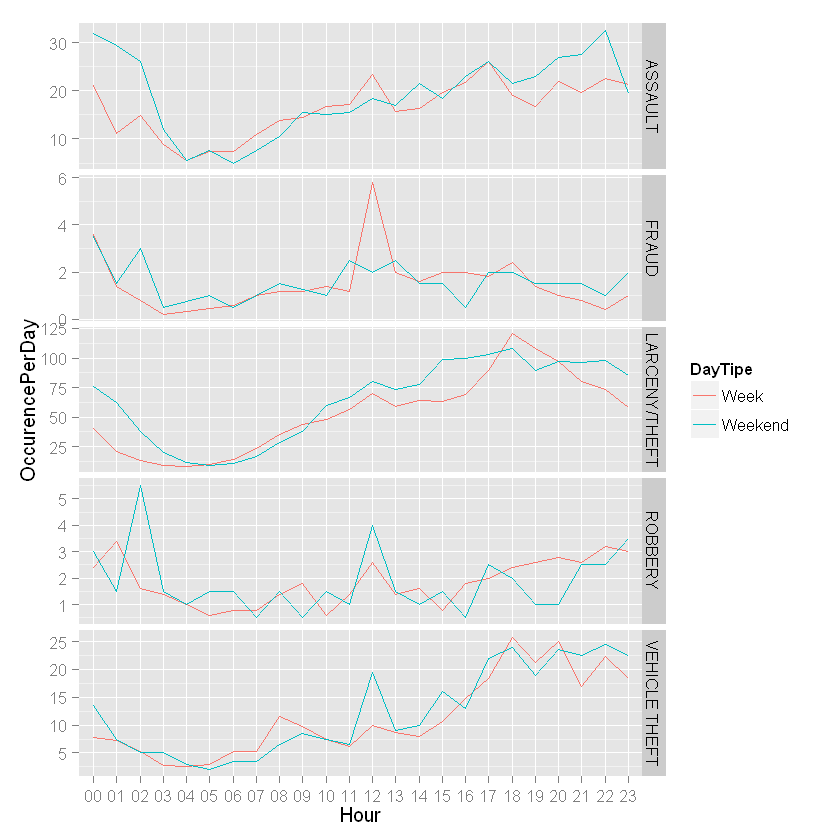

In [35]:
#head(CatHour)
Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimeTime <- ddply(Crimes, .(Category,DayTipe, Hour), nrow)
#head(CatHour)
#summary(CatHour)
summary(CrimeTime)
names(CrimeTime) <- gsub("V1", "Occurences", names(CrimeTime))
CrimeTime$OccurencePerDay <- with(CrimeTime, ifelse(DayTipe == "Weekend",Occurences/2,Occurences/5))
CrimeTimePlot <- ggplot(CrimeTime, aes(Hour,OccurencePerDay, group= DayTipe )) + geom_line(aes(colour=DayTipe ))
CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y")
#CrimeTimePlot + facet_grid(Category ~ .)

In [43]:
Fraud <- CrimeTime[CrimeTime$Category  == "FRAUD",]
#Fraud
FourAM <- CrimeTime[CrimeTime$Hour  == "04",]

In [47]:
CrimeTimeCast <- dcast(CrimeTime, DayTipe + Hour ~ Category)
#CrimeTimeCast
CrimeTimeCastCor <- CrimeTimeCast[ , CrimesConsidered]
cor(CrimeTimeCastCor, use = "na.or.complete")

Using OccurencePerDay as value column: use value.var to override.


,ASSAULT,FRAUD,VEHICLE THEFT,LARCENY/THEFT,ROBBERY
ASSAULT,1.0000000,0.4096046,0.6155014,0.7121945,0.4175055
FRAUD,0.40960458,1.00000000,0.07077001,0.25808651,0.33577387
VEHICLE THEFT,0.61550138,0.07077001,1.00000000,0.85895442,0.41450577
LARCENY/THEFT,0.7121945,0.2580865,0.8589544,1.0000000,0.2309677
ROBBERY,0.4175055,0.3357739,0.4145058,0.2309677,1.0000000


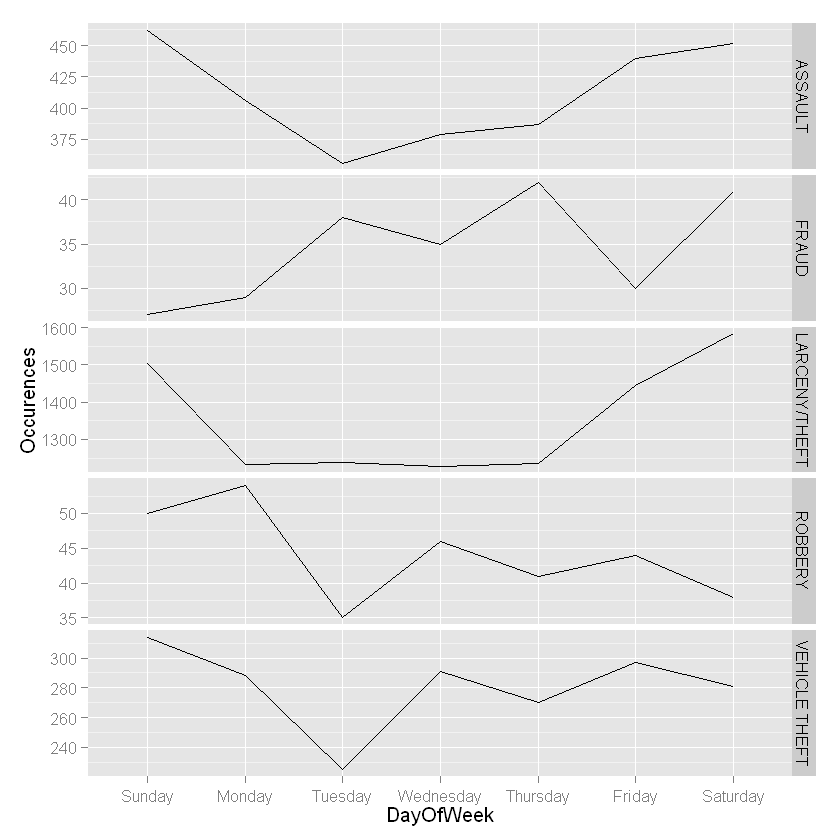

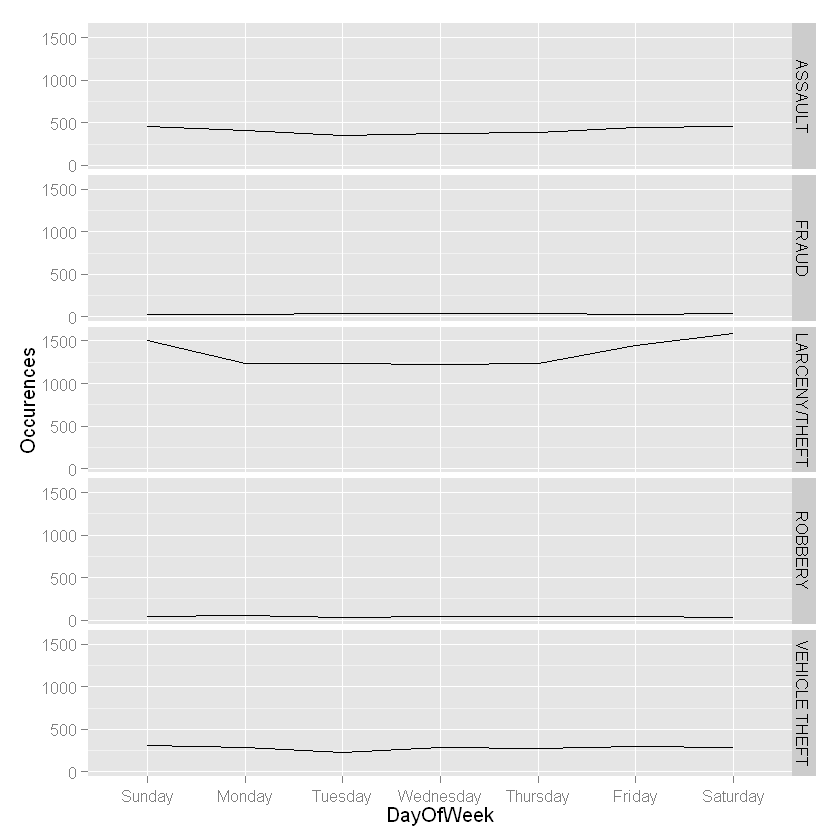

In [18]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimeDayOfWeek <- ddply(Crimes, .(Category,DayOfWeek), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimeDayOfWeek)
names(CrimeDayOfWeek) <- gsub("V1", "Occurences", names(CrimeDayOfWeek))
CrimeDayOfWeek$DayOfWeek <- factor(CrimeDayOfWeek$DayOfWeek, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
CrimeDayOfWeek <- CrimeDayOfWeek[order(CrimeDayOfWeek$DayOfWeek), ]
#CrimeTime$OccurencePerDay <- with(CrimeTime, ifelse(DayTipe == "Weekend",Occurences/2,Occurences/5))
CrimeDayOfWeekPlot <- ggplot(CrimeDayOfWeek, aes(DayOfWeek,Occurences, group= 1 )) + geom_line()
CrimeDayOfWeekPlot + facet_grid(Category ~ ., scale = "free_y")
CrimeDayOfWeekPlot + facet_grid(Category ~ .)
#CrimeTimePlot + facet_grid(Category ~ .)

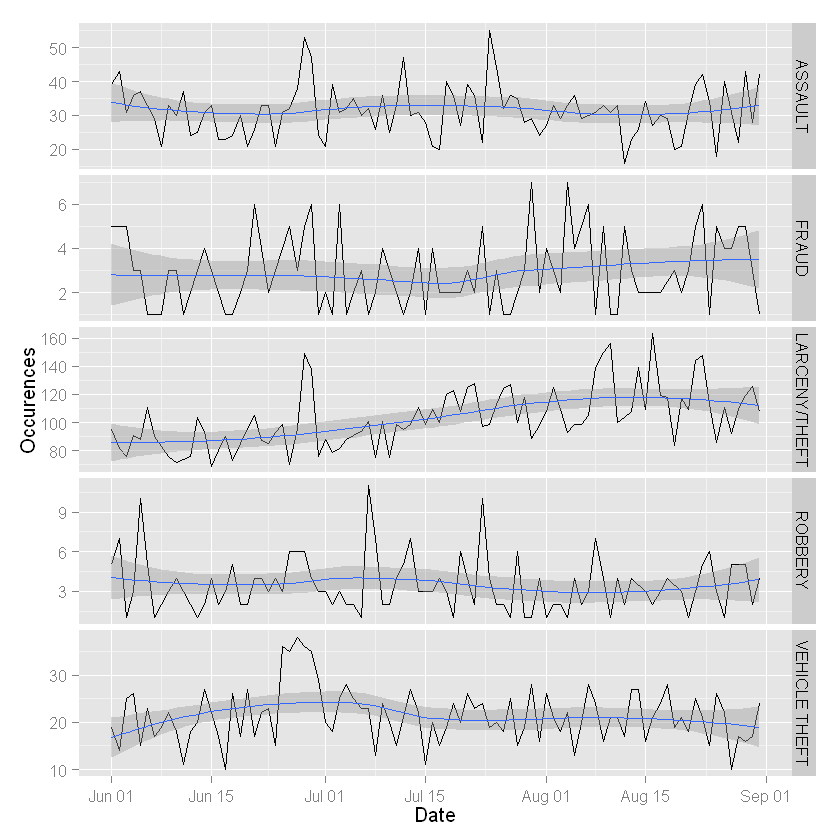

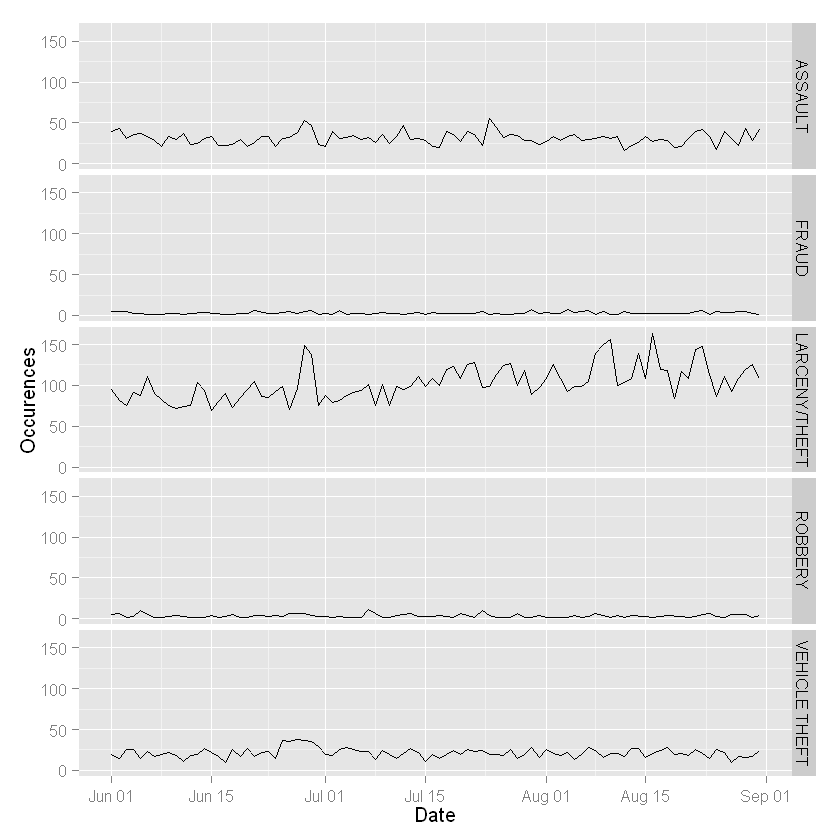

In [23]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimeDay <- ddply(Crimes, .(Category,Date), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimeDayOfWeek)
names(CrimeDay) <- gsub("V1", "Occurences", names(CrimeDay))
#CrimeDayOfWeek$DayOfWeek <- factor(CrimeDayOfWeek$DayOfWeek, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#CrimeDayOfWeek <- CrimeDayOfWeek[order(CrimeDayOfWeek$DayOfWeek), ]
#CrimeTime$OccurencePerDay <- with(CrimeTime, ifelse(DayTipe == "Weekend",Occurences/2,Occurences/5))
CrimeDayPlot <- ggplot(CrimeDay, aes(Date,Occurences, group= 1 )) + geom_line()
CrimeDayPlot + facet_grid(Category ~ ., scale = "free_y") + geom_smooth(method = "loess")
#CrimeDayPlot + facet_grid(Category ~ .)
#CrimeTimePlot + facet_grid(Category ~ .)

,Hour,PdDistrict,Occurences
1,00,BAYVIEW,63
2,00,CENTRAL,75
3,00,INGLESIDE,70
4,00,MISSION,78
5,00,NORTHERN,99
6,00,PARK,19
7,00,RICHMOND,33
8,00,SOUTHERN,111
9,00,TARAVAL,51
10,00,TENDERLOIN,33


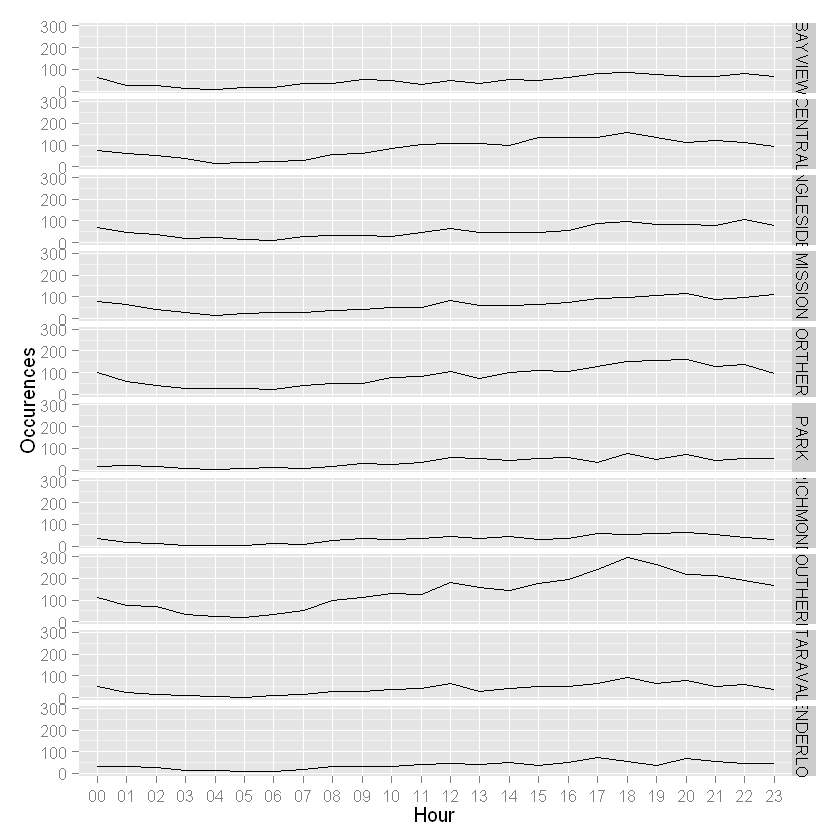

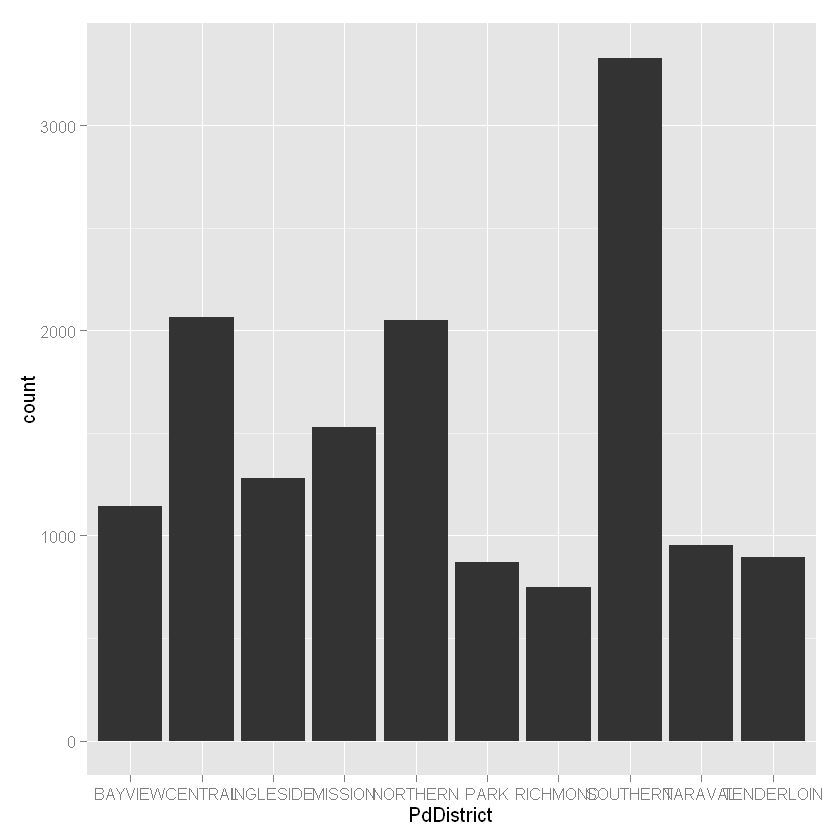

In [19]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimePlace = crimeSFrel[crimeSFrel$Category == "ASSAULT",]
CrimePlace <- ddply(Crimes, .(Hour, PdDistrict), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimePlace)
names(CrimePlace) <- gsub("V1", "Occurences", names(CrimePlace))
head(CrimePlace,10)
CrimePlacePlot <- ggplot(CrimePlace, aes(Hour ,Occurences, group = 1)) + geom_line() + facet_grid(PdDistrict ~ .,  space= "free_y" )
CrimePlacePlot
#CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y")
#CrimePlacePlot + facet_grid(PdDistrict ~ ., scale = "free_y")
CrimePlace2 <- ddply(Crimes, .( PdDistrict), nrow)
names(CrimePlace2) <- gsub("V1", "Occurences", names(CrimePlace2))
ggplot(Crimes, aes(PdDistrict)) + geom_bar()